In [1]:
!pip install pandas matplotlib seaborn plotly
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Task
Analyze automobile sales data to identify trends and relationships using various visualization techniques in Python libraries like pandas, Seaborn, and Matplotlib, and then build a Dash application with interactive components to display the results. The analysis should cover overall sales trends, sales by vehicle type, the impact of recession and seasonality, the relationship between price and sales, advertising expenditure, and the effect of unemployment. The Dash application should include drop-downs and a display area, with callbacks to update the output.

## Task 1.1: line chart for total automobile sales by year



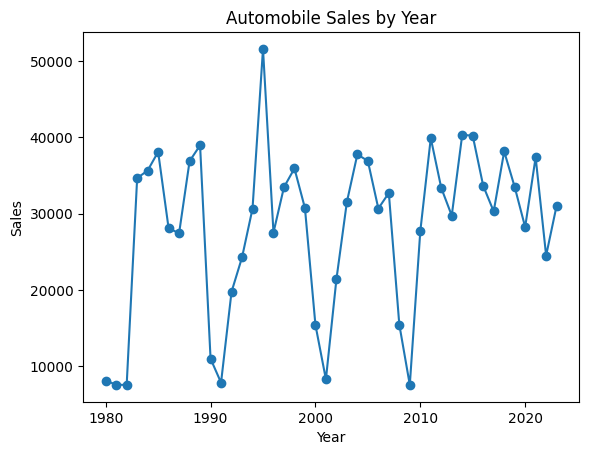

In [4]:
df.groupby('Year')['Automobile_Sales'].sum().plot(kind='line', marker='o')
plt.title('Automobile Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

## Task 1.2: line plots for vehicle type sales during recession



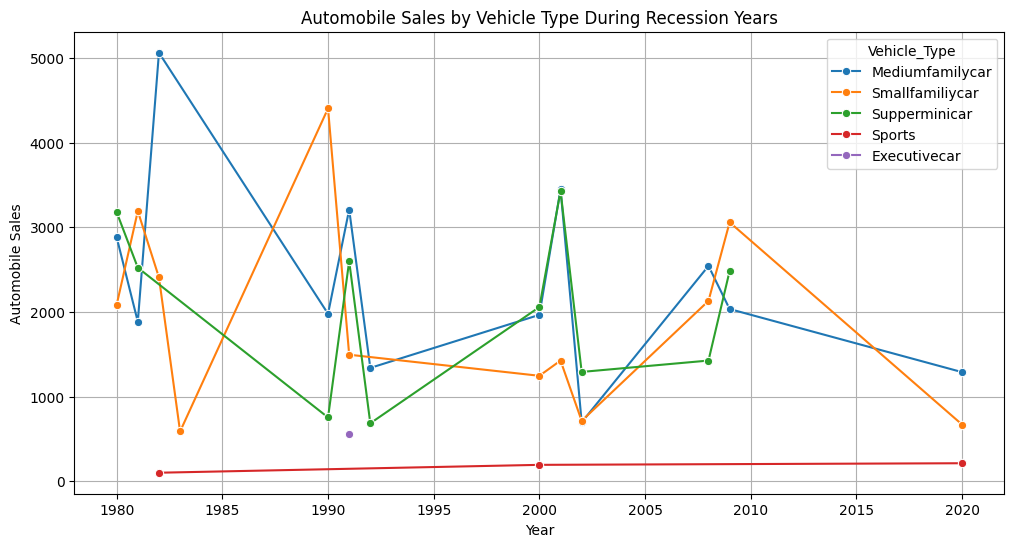

In [5]:
# Filter for recession years (Recession == 1)
recession_df = df[df['Recession'] == 1]

# Group by Year and Vehicle_Type and sum Automobile_Sales
recession_sales = recession_df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=recession_sales, x='Year', y='Automobile_Sales', hue='Vehicle_Type', marker='o')
plt.title('Automobile Sales by Vehicle Type During Recession Years')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()

## Task 1.3: sales trend comparison for recession vs. non-recession



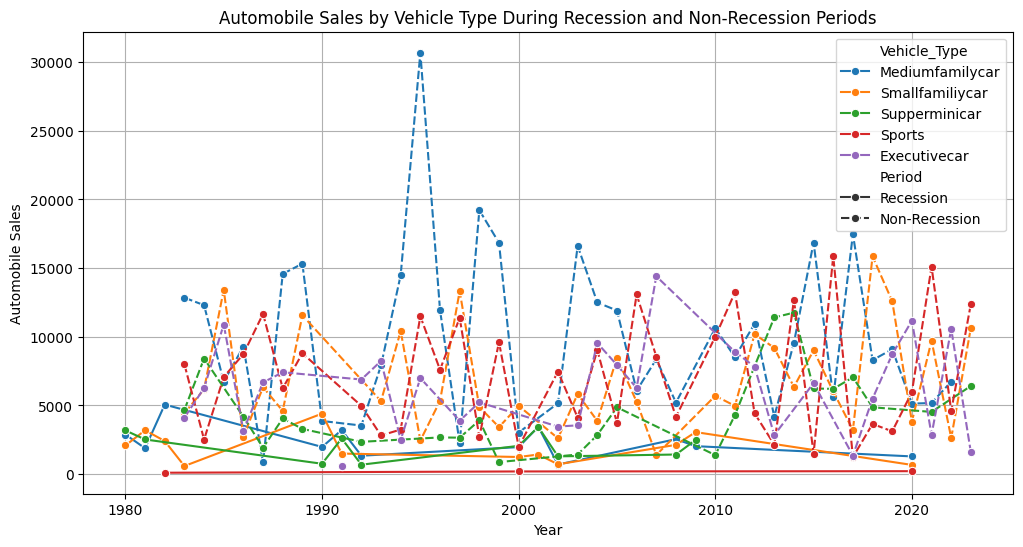

In [6]:
df['Period'] = df['Recession'].apply(lambda x: 'Recession' if x == 1 else 'Non-Recession')
sales_trends = df.groupby(['Year', 'Vehicle_Type', 'Period'])['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_trends, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Period', marker='o')
plt.title('Automobile Sales by Vehicle Type During Recession and Non-Recession Periods')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()

1.4

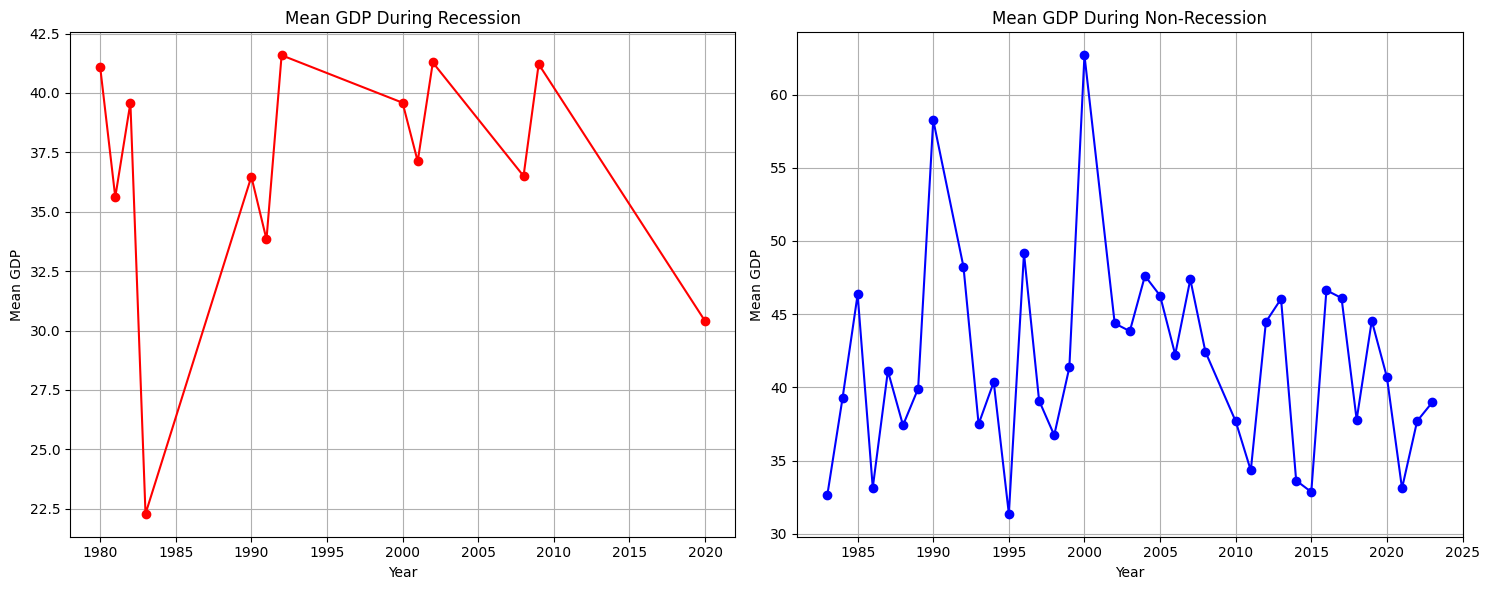

In [7]:
# 1. Create a new column named 'Period'
df['Period'] = df['Recession'].apply(lambda x: 'Recession' if x == 1 else 'Non-Recession')

# 2. Group by 'Year' and 'Period', and calculate the mean of 'GDP'
gdp_trends = df.groupby(['Year', 'Period'])['GDP'].mean().reset_index()

# 3. Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 4. Plot recession GDP trend
recession_gdp = gdp_trends[gdp_trends['Period'] == 'Recession']
axes[0].plot(recession_gdp['Year'], recession_gdp['GDP'], marker='o', color='red')
axes[0].set_title('Mean GDP During Recession')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Mean GDP')
axes[0].grid(True)

# 5. Plot non-recession GDP trend
non_recession_gdp = gdp_trends[gdp_trends['Period'] == 'Non-Recession']
axes[1].plot(non_recession_gdp['Year'], non_recession_gdp['GDP'], marker='o', color='blue')
axes[1].set_title('Mean GDP During Non-Recession')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Mean GDP')
axes[1].grid(True)

# 6. Add titles and labels (done in steps 4 and 5)

# 7. Adjust layout
plt.tight_layout()

# 8. Display the plots
plt.show()

## Bubble plot for seasonality impact

1.5


**Reasoning**:
Group the DataFrame by Year and Seasonality_Weight, calculate the mean of Automobile_Sales, and then create a bubble plot using Plotly Express to visualize the impact of seasonality on automobile sales.



In [8]:
# Group by Year and Seasonality_Weight, calculating the mean of Automobile_Sales for each group. Reset the index.
seasonality_sales = df.groupby(['Year', 'Seasonality_Weight'])['Automobile_Sales'].mean().reset_index()

# Create a bubble plot using plotly.express.scatter.
fig = px.scatter(seasonality_sales,
                 x='Year',
                 y='Automobile_Sales',
                 size='Seasonality_Weight',
                 title='Impact of Seasonality on Automobile Sales')

# Display the plot.
fig.show()

## 16 Scatter plot for price vs. sales during recession


**Reasoning**:
Filter the DataFrame to include only recession periods and create a scatter plot to visualize the relationship between average vehicle price and sales volume during these periods.



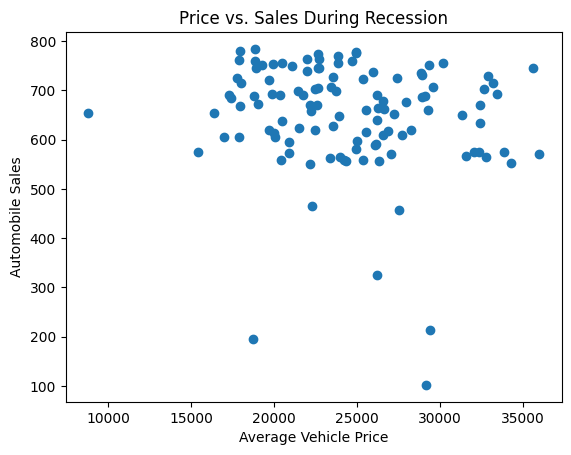

In [9]:
# Filter for recession years (Recession == 1)
recession_df = df[df['Recession'] == 1]

# Create a scatter plot
plt.scatter(recession_df['Price'], recession_df['Automobile_Sales'])
plt.title('Price vs. Sales During Recession')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.show()

## 1.7 Pie chart for advertising expenditure during recession vs. non-recession


**Reasoning**:
Filter the DataFrame for recession and non-recession periods, calculate the sum of advertising expenditure for each period, create labels, and then generate and display a pie chart.



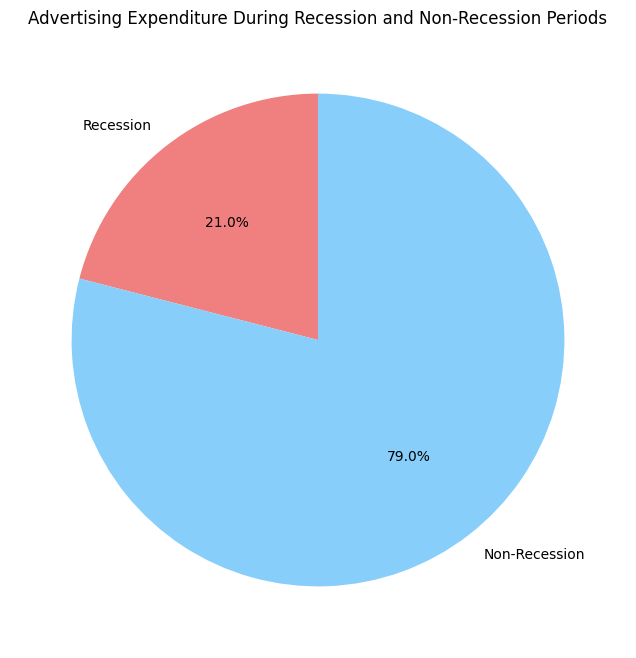

In [10]:
# Filter for recession and non-recession periods
recession_df = df[df['Recession'] == 1]
non_recession_df = df[df['Recession'] == 0]

# Calculate the sum of 'Advertising_Expenditure' for each period
recession_ad_expenditure = recession_df['Advertising_Expenditure'].sum()
non_recession_ad_expenditure = non_recession_df['Advertising_Expenditure'].sum()

# Create a list of sums and labels
expenditures = [recession_ad_expenditure, non_recession_ad_expenditure]
labels = ['Recession', 'Non-Recession']

# Generate a pie chart
plt.figure(figsize=(8, 8))
plt.pie(expenditures, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Advertising Expenditure During Recession and Non-Recession Periods')

# Display the pie chart
plt.show()

## Task 1.8

### Subtask:
Develop a pie chart to show the total advertising expenditure for each vehicle type during the recession period.


**Reasoning**:
Filter the DataFrame for recession periods, group by vehicle type and sum advertising expenditure, then create a pie chart to visualize the proportions.



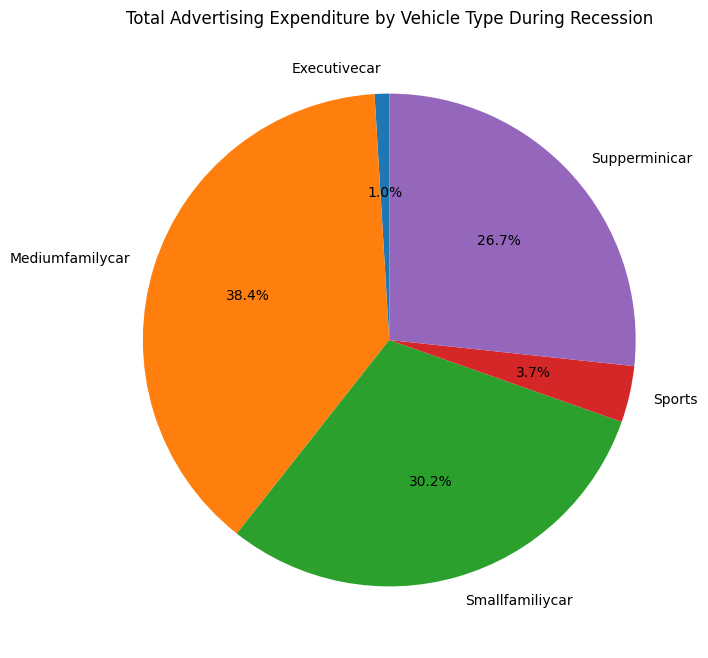

In [11]:
# Filter the DataFrame df to include only the rows where the 'Recession' column is equal to 1.
recession_df = df[df['Recession'] == 1]

# Group the recession_df by 'Vehicle_Type' and calculate the sum of 'Advertising_Expenditure' for each vehicle type.
ad_expenditure_by_type = recession_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()

# Extract the vehicle types and their corresponding total advertising expenditures.
vehicle_types = ad_expenditure_by_type['Vehicle_Type']
advertising_expenditures = ad_expenditure_by_type['Advertising_Expenditure']

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(advertising_expenditures, labels=vehicle_types, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title('Total Advertising Expenditure by Vehicle Type During Recession')

# Display the pie chart
plt.show()

## Task 1.9: line plot for unemployment rate effect

### Subtask:
Create a line plot to analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period.


**Reasoning**:
I need to filter the data, group by year and vehicle type, calculate the mean unemployment rate and sum of sales, and then plot the results using a line plot to show the relationship between unemployment and sales for each vehicle type during recession.



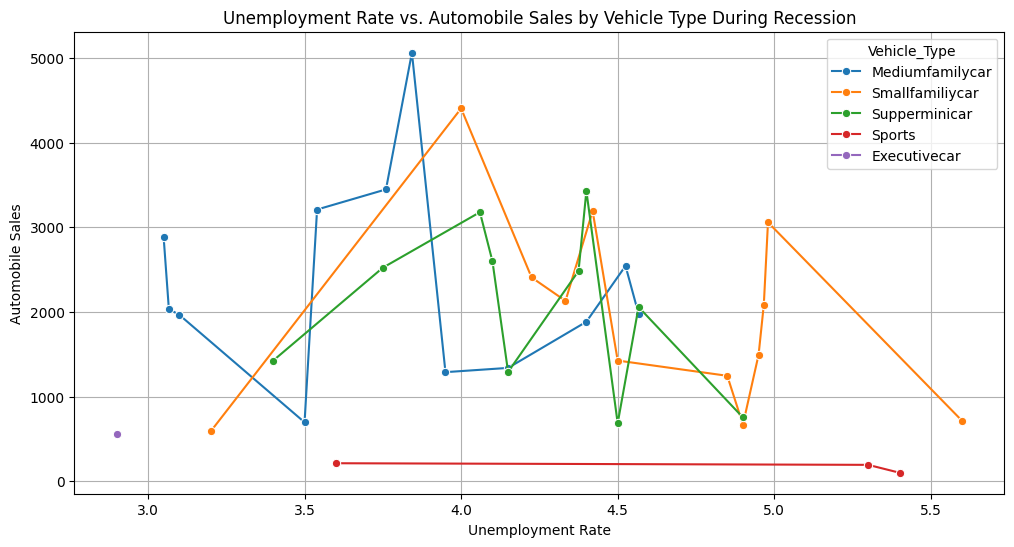

In [12]:
# 1. Filter the DataFrame df to include only the rows where the 'Recession' column is equal to 1, storing the result in recession_df.
recession_df = df[df['Recession'] == 1]

# 2. Group the recession_df by 'Year' and 'Vehicle_Type', calculating the mean of 'unemployment_rate' and the sum of 'Automobile_Sales' for each group. Reset the index of the resulting DataFrame.
unemployment_sales_recession = recession_df.groupby(['Year', 'Vehicle_Type']).agg(
    unemployment_rate=('unemployment_rate', 'mean'),
    Automobile_Sales=('Automobile_Sales', 'sum')
).reset_index()

# 3. Create a line plot using seaborn.lineplot. Use 'unemployment_rate' on the x-axis, 'Automobile_Sales' on the y-axis, and 'Vehicle_Type' for different colored lines to represent each vehicle type.
plt.figure(figsize=(12, 6))
sns.lineplot(data=unemployment_sales_recession, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type', marker='o')

# 4. Add a title to the plot, such as 'Unemployment Rate vs. Automobile Sales by Vehicle Type During Recession'.
plt.title('Unemployment Rate vs. Automobile Sales by Vehicle Type During Recession')

# 5. Label the x-axis as 'Unemployment Rate' and the y-axis as 'Automobile Sales'.
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')

# 6. Display the plot.
plt.grid(True)
plt.show()

2.1


In [33]:
import dash
from dash import dcc
from dash import html

# Instantiate a Dash application instance
app = dash.Dash(__name__)

# Set the app.layout
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard")
])

## Task 2.2: Add drop-downs

### Subtask:
Add drop-down menus with appropriate titles and options to the dashboard.

In [34]:
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard"),
    html.Div([
        html.H2("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=[
                {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
            ],
            placeholder='Select a report type',
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'}
        ),
        html.H2("Select Year:"),
        dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in df['Year'].unique()],
            value=None,
            placeholder='Select a year',
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'}
        )
    ])
])

## Task 2.3: Add output display division

### Subtask:
Add a division in the layout for displaying the output, with appropriate `id` and `classname`.

In [29]:
app.layout = html.Div([
    html.H1("Automobile Sales Statistics Dashboard"),
    html.Div([
        html.H2("Select Statistics:"),
        dcc.Dropdown(
            id='dropdown-statistics',
            options=[
                {'label': 'Yearly Statistics', 'value': 'Yearly Statistics'},
                {'label': 'Recession Period Statistics', 'value': 'Recession Period Statistics'}
            ],
            placeholder='Select a report type',
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'}
        ),
        html.H2("Select Year:"),
        dcc.Dropdown(
            id='select-year',
            options=[{'label': i, 'value': i} for i in df['Year'].unique()],
            value=None,
            placeholder='Select a year',
            style={'width': '80%', 'padding': '3px', 'font-size': '20px', 'text-align-last': 'center'}
        )
    ]),
    html.Div(id='output-container', className='chart-container')
])

## Task 2.4: Create callbacks


In [30]:
from dash.dependencies import Input, Output
import plotly.graph_objects as go

@app.callback(
    Output(component_id='output-container', component_property='children'),
    [Input(component_id='dropdown-statistics', component_property='value'),
     Input(component_id='select-year', component_property='value')]
)
def update_output_div(selected_statistics, selected_year):
    if selected_statistics == 'Yearly Statistics':
        if selected_year:
            yearly_data = df[df['Year'] == selected_year]
            # Line plot of Automobile sales by month
            yearly_sales_by_month = yearly_data.groupby('Month')['Automobile_Sales'].sum().reset_index()
            yearly_sales_by_month['Month'] = pd.Categorical(yearly_sales_by_month['Month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
            yearly_sales_by_month = yearly_sales_by_month.sort_values('Month')
            line_plot = dcc.Graph(
                figure=go.Figure(
                    data=[
                        go.Scatter(
                            x=yearly_sales_by_month['Month'],
                            y=yearly_sales_by_month['Automobile_Sales'],
                            mode='lines+markers'
                        )
                    ],
                    layout=go.Layout(
                        title=f'Automobile Sales by Month in {selected_year}',
                        xaxis={'title': 'Month'},
                        yaxis={'title': 'Automobile Sales'}
                    )
                )
            )

            # Pie chart of Automobile sales by vehicle type
            yearly_sales_by_type = yearly_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()
            pie_chart = dcc.Graph(
                figure=go.Figure(
                    data=[
                        go.Pie(
                            labels=yearly_sales_by_type['Vehicle_Type'],
                            values=yearly_sales_by_type['Automobile_Sales']
                        )
                    ],
                    layout=go.Layout(
                        title=f'Automobile Sales by Vehicle Type in {selected_year}'
                    )
                )
            )
            return [line_plot, pie_chart]
        else:
            # Overall yearly statistics
            overall_yearly_sales = df.groupby('Year')['Automobile_Sales'].sum().reset_index()
            overall_line_plot = dcc.Graph(
                figure=go.Figure(
                    data=[
                        go.Scatter(
                            x=overall_yearly_sales['Year'],
                            y=overall_yearly_sales['Automobile_Sales'],
                            mode='lines+markers'
                        )
                    ],
                    layout=go.Layout(
                        title='Total Automobile Sales by Year',
                        xaxis={'title': 'Year'},
                        yaxis={'title': 'Total Automobile Sales'}
                    )
                )
            )
            return [overall_line_plot]

    elif selected_statistics == 'Recession Period Statistics':
        recession_df = df[df['Recession'] == 1]
        # Line plot of sales by vehicle type during recession
        recession_sales_by_type = recession_df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().reset_index()
        recession_line_plot = dcc.Graph(
            figure=go.Figure(
                data=[
                    go.Scatter(
                        x=recession_sales_by_type[recession_sales_by_type['Vehicle_Type'] == vtype]['Year'],
                        y=recession_sales_by_type[recession_sales_by_type['Vehicle_Type'] == vtype]['Automobile_Sales'],
                        mode='lines+markers',
                        name=vtype
                    ) for vtype in recession_sales_by_type['Vehicle_Type'].unique()
                ],
                layout=go.Layout(
                    title='Automobile Sales by Vehicle Type During Recession',
                    xaxis={'title': 'Year'},
                    yaxis={'title': 'Automobile Sales'}
                )
            )
        )

        # Scatter plot of price vs. sales during recession
        recession_price_sales_scatter = dcc.Graph(
            figure=go.Figure(
                data=[
                    go.Scatter(
                        x=recession_df['Price'],
                        y=recession_df['Automobile_Sales'],
                        mode='markers'
                    )
                ],
                layout=go.Layout(
                    title='Price vs. Sales During Recession',
                    xaxis={'title': 'Average Vehicle Price'},
                    yaxis={'title': 'Automobile Sales'}
                )
            )
        )

        # Pie chart of advertising expenditure by vehicle type during recession
        recession_ad_expenditure_by_type = recession_df.groupby('Vehicle_Type')['Advertising_Expenditure'].sum().reset_index()
        recession_ad_pie_chart = dcc.Graph(
            figure=go.Figure(
                data=[
                    go.Pie(
                        labels=recession_ad_expenditure_by_type['Vehicle_Type'],
                        values=recession_ad_expenditure_by_type['Advertising_Expenditure']
                    )
                ],
                layout=go.Layout(
                    title='Total Advertising Expenditure by Vehicle Type During Recession'
                )
            )
        )

        # Line plot of unemployment rate vs. sales by vehicle type during recession
        recession_unemployment_sales = recession_df.groupby(['Year', 'Vehicle_Type']).agg(
            unemployment_rate=('unemployment_rate', 'mean'),
            Automobile_Sales=('Automobile_Sales', 'sum')
        ).reset_index()
        recession_unemployment_line_plot = dcc.Graph(
            figure=go.Figure(
                data=[
                    go.Scatter(
                        x=recession_unemployment_sales[recession_unemployment_sales['Vehicle_Type'] == vtype]['unemployment_rate'],
                        y=recession_unemployment_sales[recession_unemployment_sales['Vehicle_Type'] == vtype]['Automobile_Sales'],
                        mode='lines+markers',
                        name=vtype
                    ) for vtype in recession_unemployment_sales['Vehicle_Type'].unique()
                ],
                layout=go.Layout(
                    title='Unemployment Rate vs. Automobile Sales by Vehicle Type During Recession',
                    xaxis={'title': 'Unemployment Rate'},
                    yaxis={'title': 'Automobile Sales'}
                )
            )
        )
        return [recession_line_plot, recession_price_sales_scatter, recession_ad_pie_chart, recession_unemployment_line_plot]
    else:
        return None